In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv('Salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [55]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [56]:
df.drop('Unnamed: 0',axis=1,inplace=True)

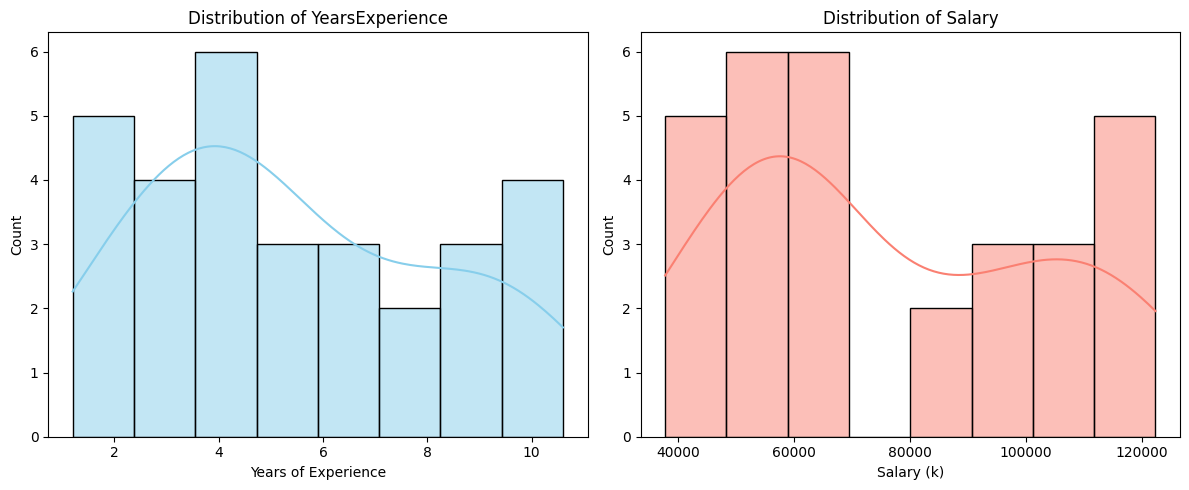

In [57]:
plt.figure(figsize=(12,5))

# Distribution of YearsExperience
plt.subplot(1, 2, 1)
sns.histplot(df['YearsExperience'], bins=8, kde=True, color='skyblue')
plt.xlabel('Years of Experience')
plt.title('Distribution of YearsExperience')

# Distribution of Salary
plt.subplot(1, 2, 2)
sns.histplot(df['Salary'], bins=8, kde=True, color='salmon')
plt.xlabel('Salary (k)')
plt.title('Distribution of Salary')

plt.tight_layout()
plt.show()

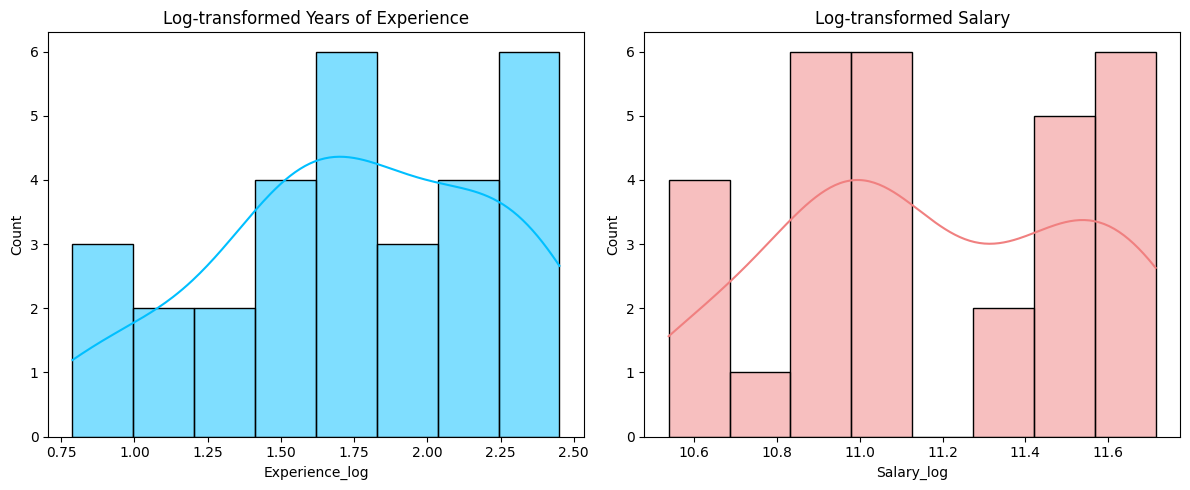

In [65]:
import numpy as np
df['Salary_log'] = np.log(df['Salary'] + 1)
df['Experience_log'] = np.log(df['YearsExperience'] + 1)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Experience_log'], bins=8, kde=True, color='deepskyblue', ax=axes[0])
axes[0].set_title('Log-transformed Years of Experience')
sns.histplot(df['Salary_log'], bins=8, kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title('Log-transformed Salary')
plt.tight_layout()
plt.show()


In [60]:
model=LinearRegression()
x=df[['YearsExperience']]
y=df['Salary']
model.fit(x,y)

print("PREDICTION FOR 8 YEARS EXPERIENCE")
model.predict(pd.DataFrame({"YearsExperience": [8]}))

PREDICTION FOR 8 YEARS EXPERIENCE


array([100447.90253816])

In [61]:
#intrecept
print(" fixed salary (intercept) offered even with 0 years of experience:",model.intercept_)

 fixed salary (intercept) offered even with 0 years of experience: 24848.203966523208


In [62]:
#slope
print(" increase in salary for each additional year of experience:",model.coef_)

 increase in salary for each additional year of experience: [9449.96232146]


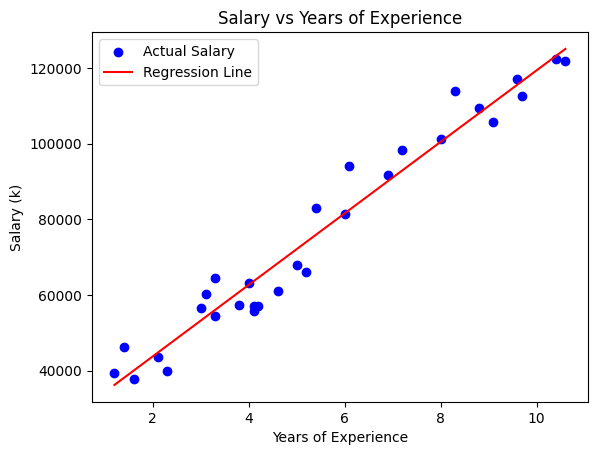

In [67]:
# Plot regression line
plt.scatter(x, y, color='blue', label='Actual Salary')
plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (k)')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()

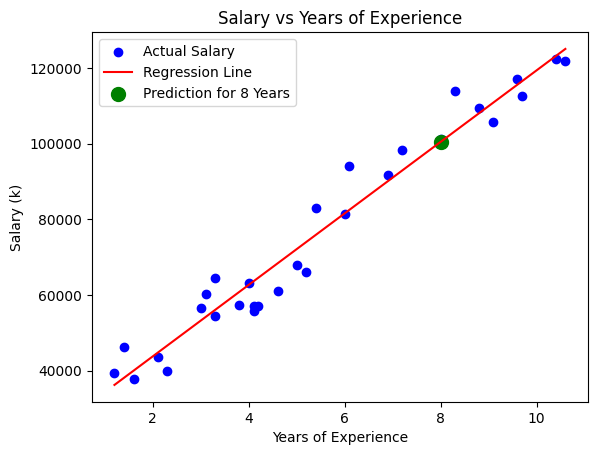

In [68]:
# Plot regression line
plt.scatter(x, y, color='blue', label='Actual Salary')
plt.plot(x, model.predict(x), color='red', label='Regression Line')
plt.scatter(8, model.predict(pd.DataFrame({"YearsExperience": [8]})), color='green', s=100, label='Prediction for 8 Years')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (k)')
plt.title('Salary vs Years of Experience')
plt.legend()
plt.show()